In [3]:
import os
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.applications.imagenet_utils import preprocess_input



In [9]:
import os
import numpy as np
from sklearn.model_selection import train_test_split

# Define the image directory
image_dir = "C:/Users/hp/Downloads/archive (1)"

# List to store image paths and labels
image_paths = []
labels = []

# Iterate over the subdirectories in the image directory
for subdir, dirs, files in os.walk(image_dir):
    if not dirs:  # If there are no subdirectories (i.e., this is a leaf directory)
        # Append the file paths to the image_paths list
        for file in files:
            if file.endswith('.jpg'):
                image_paths.append(os.path.join(subdir, file))
                label_parts = os.path.basename(subdir)
                labels.append(label_parts)

# Convert the lists to numpy arrays
X = np.array(image_paths)
y = np.array(labels)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
import os

# Define build directory using a raw string
build_dir = r"C:\Users\hp\Downloads\archive (1)"

caries_dir = os.path.join(build_dir,'caries')
gingivitis_dir = os.path.join(build_dir,'gingivitis')
toothDiscoloration_dir = os.path.join(build_dir,'toothDiscoloration')
ulcers_dir = os.path.join(build_dir,'ulcers')
hypodontia_dir = os.path.join(build_dir,'hypodontia')
os.listdir(build_dir)

['Caries_Gingivitus_ToothDiscoloration_Ulcer-yolo_annotated-Dataset',
 'Data caries',
 'Gingivitis',
 'hypodontia',
 'Mouth Ulcer',
 'Tooth Discoloration']

C:\Users\hp\AppData\Local\Temp\ipykernel_16884\1337493766.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=categories_numeric, y=values_numeric, palette="viridis")


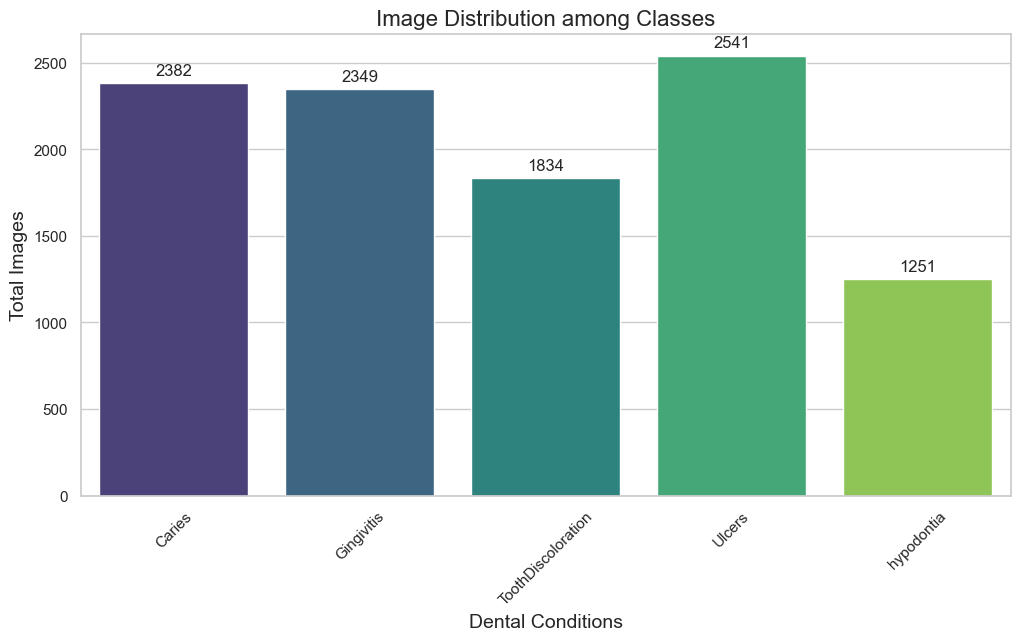

In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Sample categories and values (replace with your actual data)
categories = ['Caries', 'Gingivitis', 'ToothDiscoloration', 'Ulcers', 'hypodontia']
values = [2382, 2349, 1834, 2541, 1251]

# Filter out non-numeric values and corresponding categories
values_numeric = []
categories_numeric = []
for category, value in zip(categories, values):
    if isinstance(value, (int, float)):
        values_numeric.append(value)
        categories_numeric.append(category)

# Improved 2D bar plot
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

# Creating the barplot with filtered numeric values
barplot = sns.barplot(x=categories_numeric, y=values_numeric, palette="viridis")

# Adding the text on the top of each bar
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='center', 
                     xytext=(0, 9), 
                     textcoords='offset points')

# Setting titles and labels
plt.xlabel("Dental Conditions", fontsize=14)
plt.ylabel("Total Images", fontsize=14)
plt.title("Image Distribution among Classes", fontsize=16)
plt.xticks(rotation=45)
plt.savefig('imageDistribution.png')
plt.show()

In [2]:
# Constants
DATA_DIR = "C:/Users/hp/Downloads/archive (1)"
BATCH_SIZE = 32
NUM_CLASSES = 6
IMG_SIZE = (256, 256, 3)


In [4]:
# Importing necessary libraries
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation and generators
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    DATA_DIR,
    target_size=IMG_SIZE[:2],
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    DATA_DIR,
    target_size=IMG_SIZE[:2],
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

Found 10055 images belonging to 6 classes.
Found 2511 images belonging to 6 classes.


In [5]:
from keras.applications import VGG16
from keras.models import Model
from keras.layers import Flatten, Dense

def build_combined_model(input_shape):
    base_model = VGG16(include_top=False, weights='imagenet', input_shape=input_shape)
    
    # Flatten the output of VGG16
    x = Flatten()(base_model.output)
    
    # Add additional layers
    x = Dense(1024, activation='relu')(x)
    x = Dense(NUM_CLASSES, activation='softmax')(x)
    
    return Model(base_model.input, x)

# Create the model
combined_model = build_combined_model(IMG_SIZE)


In [7]:
from keras.applications import VGG16
from keras.layers import Flatten, Dense
from tensorflow.keras.utils import plot_model

# Visualize model architecture
plot_model(model, to_file='vgg16_model.png', show_shapes=True, show_layer_names=True)


def build_vgg16_model(input_shape, num_classes):
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)

    # Freeze the base VGG16 layers
    for layer in base_model.layers:
        layer.trainable = False

    # Add custom classification layers
    x = Flatten()(base_model.output)
    x = Dense(1024, activation='relu')(x)
    output = Dense(num_classes, activation='softmax')(x)

    # Create the model
    model = Model(inputs=base_model.input, outputs=output)

    return model

# Build the VGG16 model
model = build_vgg16_model(input_shape=(256, 256, 3), num_classes=6)

# Print model summary
model.summary()

# Visualize model architecture
plot_model(model, to_file='vgg16_model.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 256, 256, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 256, 256, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 128, 128, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 128, 128, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 64, 64, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 64, 64, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 64, 64, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 32, 32, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 32, 32, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 32, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 32, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 16, 16, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1024)           │    33,555,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 6)              │         6,150 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 48,276,294 (184.16 MB)

 Trainable params: 33,561,606 (128.03 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [9]:
from keras.optimizers import Adam

# Compile the model with Adam optimizer
model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])


In [14]:

# Define callbacks
model_checkpoint = ModelCheckpoint(filepath='vgg16_model.keras', monitor='val_accuracy', mode='max', save_best_only=True, verbose=1)
early_stopping = EarlyStopping(monitor='val_accuracy', min_delta=0.001, patience=15, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, verbose=1, min_delta=0.0001, min_lr=0.0001)


In [22]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG16
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# Constants
DATA_DIR = ("C:/Users/hp/Downloads/archive (1)")
BATCH_SIZE = 32
NUM_CLASSES = 6
IMG_SIZE = (256, 256, 3)

# Data augmentation and generators
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    DATA_DIR,
    target_size=IMG_SIZE[:2],
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    DATA_DIR,
    target_size=IMG_SIZE[:2],
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

# Load pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=IMG_SIZE)

# Freeze the layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(NUM_CLASSES, activation='softmax')(x)

# Combine the base model with custom layers
model = Model(inputs=base_model.input, outputs=predictions)


# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])


# Define callbacks
# Define callbacks
checkpoint = ModelCheckpoint(filepath='vgg16_model.keras', monitor='val_accuracy', mode='max', save_best_only=True, verbose=1)
earlystop = EarlyStopping(monitor='val_accuracy', min_delta=0.001, patience=15, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, verbose=1, min_delta=0.0001, min_lr=0.0001)
callbacks = [checkpoint, earlystop, reduce_lr]

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE,
    epochs=15,
    callbacks=callbacks
)


Found 10055 images belonging to 6 classes.
Found 2511 images belonging to 6 classes.
Epoch 1/15
314/314 ━━━━━━━━━━━━━━━━━━━━ 0s 23s/step - accuracy: 0.4296 - loss: 1.4262 
Epoch 1: val_accuracy improved from -inf to 0.51482, saving model to vgg16_model.keras
314/314 ━━━━━━━━━━━━━━━━━━━━ 9007s 29s/step - accuracy: 0.4298 - loss: 1.4257 - val_accuracy: 0.5148 - val_loss: 1.3179 - learning_rate: 0.0010
Epoch 2/15
  1/314 ━━━━━━━━━━━━━━━━━━━━ 1:56:03 22s/step - accuracy: 0.5625 - loss: 1.2178

c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)



Epoch 2: val_accuracy improved from 0.51482 to 0.53333, saving model to vgg16_model.keras
314/314 ━━━━━━━━━━━━━━━━━━━━ 34s 38ms/step - accuracy: 0.5625 - loss: 1.2178 - val_accuracy: 0.5333 - val_loss: 1.1290 - learning_rate: 0.0010
Epoch 3/15
314/314 ━━━━━━━━━━━━━━━━━━━━ 0s 23s/step - accuracy: 0.5965 - loss: 1.0685 
Epoch 3: val_accuracy improved from 0.53333 to 0.59816, saving model to vgg16_model.keras
314/314 ━━━━━━━━━━━━━━━━━━━━ 9103s 29s/step - accuracy: 0.5965 - loss: 1.0685 - val_accuracy: 0.5982 - val_loss: 1.1680 - learning_rate: 0.0010
Epoch 4/15
  1/314 ━━━━━━━━━━━━━━━━━━━━ 2:14:53 26s/step - accuracy: 0.7188 - loss: 0.8155
Epoch 4: val_accuracy did not improve from 0.59816
314/314 ━━━━━━━━━━━━━━━━━━━━ 39s 41ms/step - accuracy: 0.7188 - loss: 0.8155 - val_accuracy: 0.5333 - val_loss: 1.1930 - learning_rate: 0.0010
Epoch 5/15
314/314 ━━━━━━━━━━━━━━━━━━━━ 0s 23s/step - accuracy: 0.6348 - loss: 0.9611 
Epoch 5: val_accuracy improved from 0.59816 to 0.61739, saving model to v

In [24]:
# Compile the model
combined_model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Evaluate the model
test_loss, test_accuracy = combined_model.evaluate(validation_generator, steps=validation_generator.samples // BATCH_SIZE)
print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}')


78/78 ━━━━━━━━━━━━━━━━━━━━ 2140s 27s/step - accuracy: 0.1691 - loss: 2.1113
Test Loss: 2.1149, Test Accuracy: 0.1659


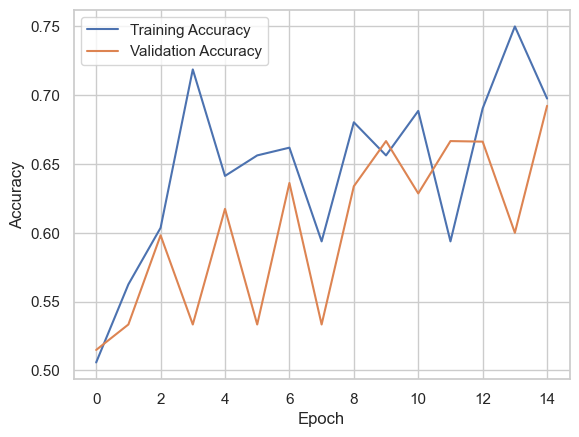

79/79 ━━━━━━━━━━━━━━━━━━━━ 2232s 28s/step


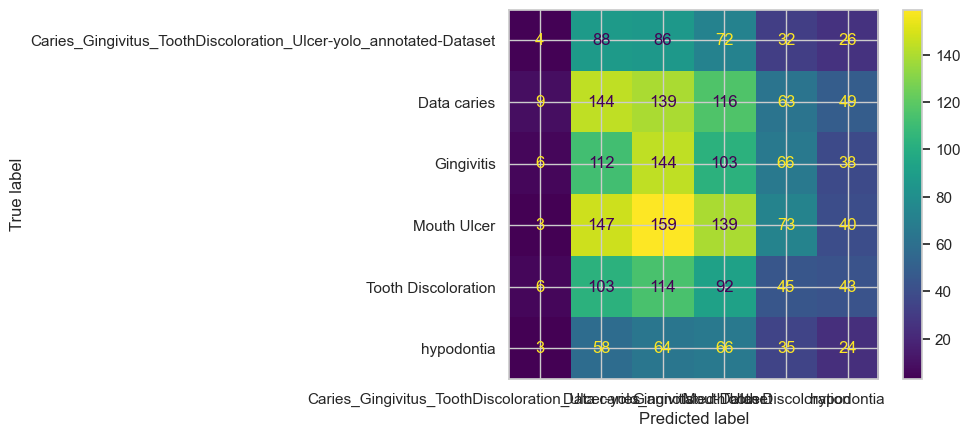

In [25]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Accuracy graphs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Confusion matrix
# Generate predictions
predictions = model.predict(validation_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = validation_generator.classes

# Compute confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Display confusion matrix
class_names = validation_generator.class_indices.keys()
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot()
plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


No images found in C:/Users/hp/Downloads/archive (1)/hypodontia directory.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


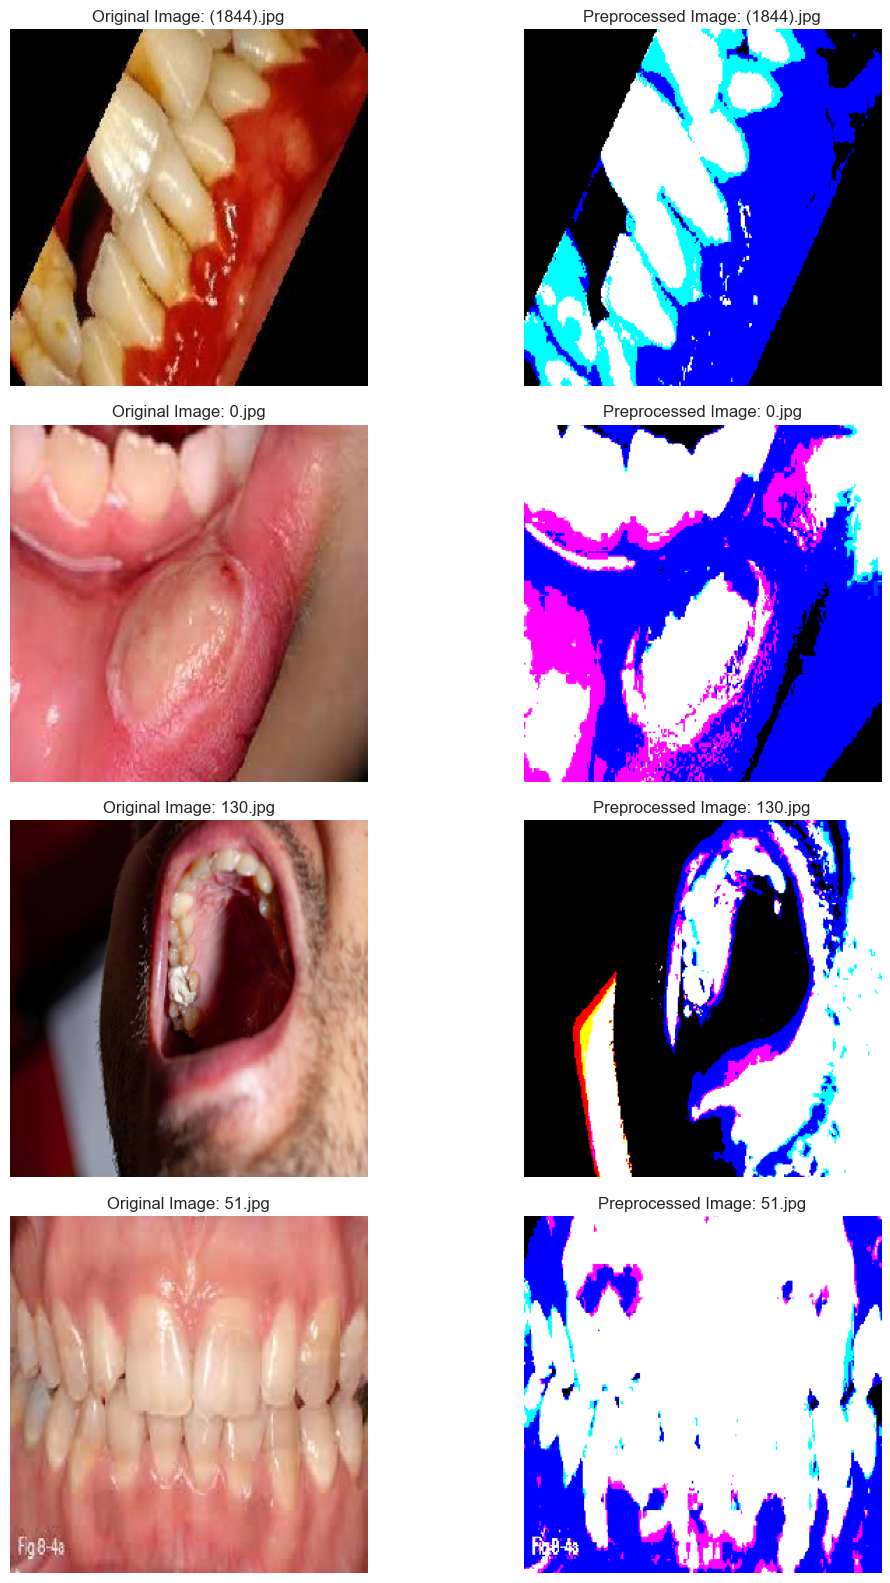

In [40]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from keras.applications.vgg16 import preprocess_input

# Directory paths
class_dirs = [
    "C:/Users/hp/Downloads/archive (1)/Gingivitis/Gingivitis",
    "C:/Users/hp/Downloads/archive (1)/hypodontia",
    "C:/Users/hp/Downloads/archive (1)/Mouth Ulcer/Mouth Ulcer/ulcer original dataset/ulcer original dataset",
    "C:/Users/hp/Downloads/archive (1)/Data caries/Data caries/caries orignal data set/done",
    "C:/Users/hp/Downloads/archive (1)/Tooth Discoloration/Tooth Discoloration/tooth discoloration original dataset/tooth discoloration original dataset"
]

# Selecting one random image from each class for visualization
selected_images = []
for class_dir in class_dirs:
    images = [f for f in os.listdir(class_dir) if f.endswith('.jpg')]
    if images:  # Check if the list is not empty
        selected_image = np.random.choice(images)
        selected_images.append(os.path.join(class_dir, selected_image))
    else:
        print(f"No images found in {class_dir} directory.")

# Function to preprocess the image
def preprocess_image(image_path, target_size):
    img = load_img(image_path, target_size=target_size)
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    return img

# Visualize original and preprocessed images
plt.figure(figsize=(12, 4 * len(selected_images)))
for i, image_path in enumerate(selected_images):
    # Original Image
    original_img = load_img(image_path, target_size=(256, 256))
    plt.subplot(len(selected_images), 2, 2*i + 1)
    plt.imshow(original_img)
    plt.title(f"Original Image: {os.path.basename(image_path)}")
    plt.axis('off')
    
    # Preprocessed Image
    preprocessed_img = preprocess_image(image_path, target_size=(256, 256))
    plt.subplot(len(selected_images), 2, 2*i + 2)
    plt.imshow(preprocessed_img[0])
    plt.title(f"Preprocessed Image: {os.path.basename(image_path)}")
    plt.axis('off')

plt.tight_layout()
plt.show()
